In [51]:
import pandas as pd
import numpy as np

In [ ]:
# Define the file path correctly
path = "https://raw.githubusercontent.com/NRSchaaf/weathering_the_rails/refs/heads/main/data/raw/RR_Accident_Weather_Data.csv"

# Read the CSV with the correct delimiter
df = pd.read_csv(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
df.head()

,reportingrailroadcode,accidentnumber,date,time,accidenttype,hazmatreleasedcars,station,stateabbr,temperature,visibility_code,...,trainspeed,equipmentdamagecost,trackdamagecost,totaldamagecost,primaryaccidentcausecode,latitude,longitude,prior_temp,actual_temp,following_temp
0,CSX,000178042,8/7/2018,10:51 AM,Derailment,0,BUFFALO,NY,73,2,...,6,19801,1440,21241,T001,42.901973,-78.773441,79.3,75.1,72.4
1,CSX,000182665,4/30/2019,12:25 AM,Derailment,0,MILLBURY,OH,42,4,...,7,21848,1017,22865,T111,41.544006,-83.485654,44.3,45.5,56.6
2,CSX,000138406,12/3/2014,11:45 PM,Derailment,0,PARMA,OH,35,4,...,7,20456,500,20956,T110,41.406978,-81.787482,30.0,34.7,30.4
3,CSX,000188525,2/19/2020,8:44 AM,Derailment,0,CINCINNATI,OH,25,2,...,0,84949,0,625123,T207,39.125335,-84.540044,48.2,34.9,29.7
4,CSX,000175393,3/24/2018,10:53 AM,Derailment,0,LIMA,OH,36,2,...,7,115993,0,196239,T311,40.745354,-84.101095,33.6,31.3,31.8


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   reportingrailroadcode     4595 non-null   object 
 1   accidentnumber            4595 non-null   object 
 2   date                      4595 non-null   object 
 3   time                      4595 non-null   object 
 4   accidenttype              4595 non-null   object 
 5   hazmatreleasedcars        4595 non-null   int64  
 6   station                   4595 non-null   object 
 7   stateabbr                 4595 non-null   object 
 8   temperature               4595 non-null   int64  
 9   visibility_code           4595 non-null   int64  
 10  visibility                4595 non-null   object 
 11  weathercondition          4595 non-null   object 
 12  tracktype                 4595 non-null   object 
 13  equipmenttype             4303 non-null   object 
 14  trainspe

In [57]:
df.shape

(4595, 24)

In [58]:
df.isnull().sum()


,0
reportingrailroadcode,0
accidentnumber,0
date,0
time,0
accidenttype,0
hazmatreleasedcars,0
station,0
stateabbr,0
temperature,0
visibility_code,0


In [59]:
df['equipmenttype'].value_counts()

,count
equipmenttype,
Freight Train,2510
Yard/switching,1183
Light loco(s),213
EMU,99
Cut of cars,85
Passenger Train - Pulling,73
Commuter Train - Pulling,44
Single Car,33
Work train,26


In [60]:
# Impute missing values and assign back to the column
df['equipmenttype'] = df['equipmenttype'].fillna(df['equipmenttype'].mode()[0])

# Verify there are no more missing values
print(df['equipmenttype'].isnull().sum())


0


<ipython-input-61-c5026fae664e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='equipmenttype', y='totaldamagecost', data=df, palette="coolwarm")


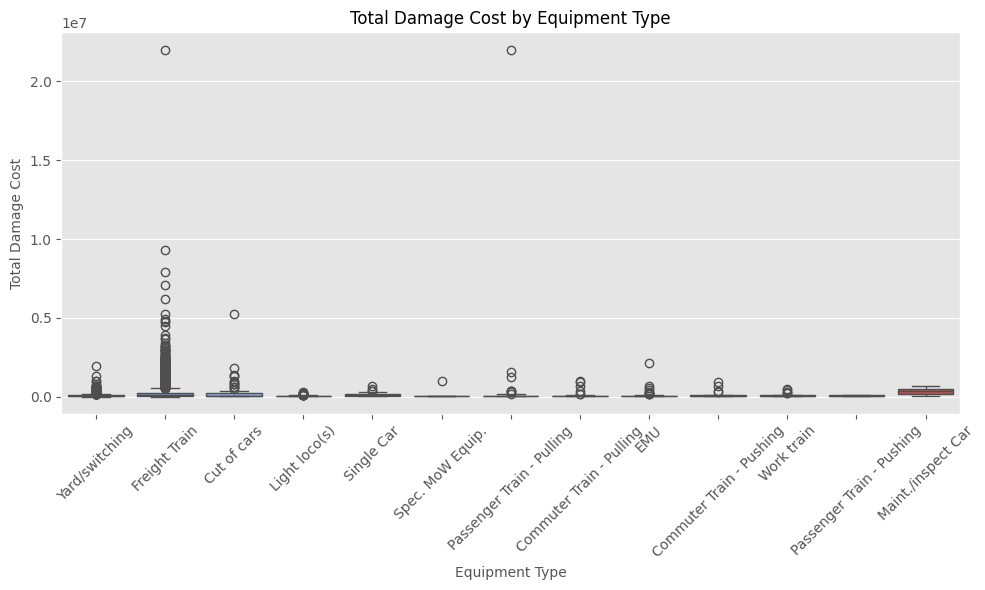

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot: Total damage cost by equipment type
plt.figure(figsize=(10, 6))
sns.boxplot(x='equipmenttype', y='totaldamagecost', data=df, palette="coolwarm")
plt.title("Total Damage Cost by Equipment Type", fontsize=12)
plt.xlabel("Equipment Type", fontsize=10)
plt.ylabel("Total Damage Cost", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
df_copy=df.copy()

In [63]:
if 'temp_category' in df_copy.columns:
    avg_cost_by_temp = df_copy.groupby('temp_category')['totaldamagecost'].mean().sort_values()
    plt.figure(figsize=(8, 6))
    avg_cost_by_temp.plot(kind='bar', color='coral', edgecolor='black')
    plt.title("Average Total Damage Cost by Temperature Category", fontsize=16)
    plt.xlabel("Temperature Category", fontsize=12)
    plt.ylabel("Average Total Damage Cost", fontsize=12)
    plt.tight_layout()
    plt.show()


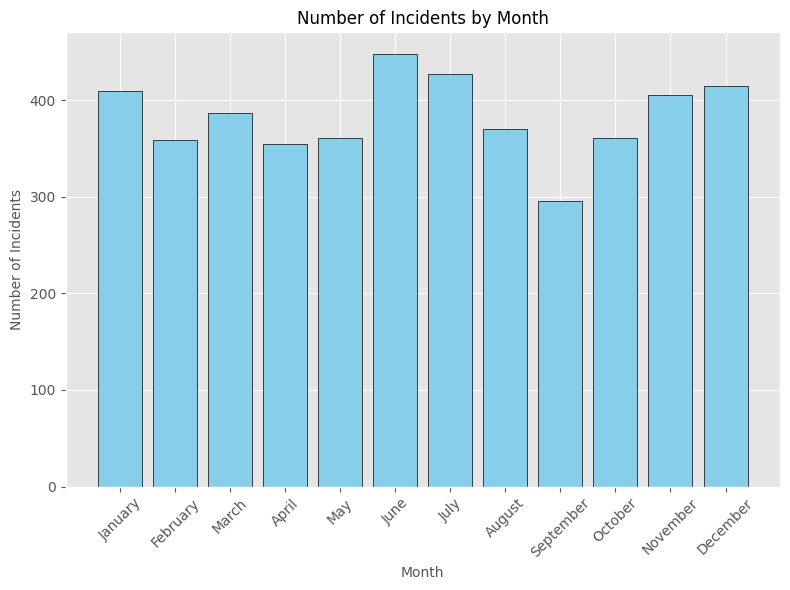

In [64]:
# Import calendar for month names
import calendar

# Ensure 'date' is in datetime format
df_copy['date'] = pd.to_datetime(df_copy['date'], errors='coerce')

# Extract the month
df_copy['month'] = df_copy['date'].dt.month

# Count incidents by month
incidents_by_month = df_copy['month'].value_counts().sort_index()

# Plot incidents by month with proper month labels
plt.figure(figsize=(8, 6))
plt.bar(incidents_by_month.index, incidents_by_month.values, color='skyblue', edgecolor='black')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Number of Incidents', fontsize=10)
plt.title('Number of Incidents by Month', fontsize=12)
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)], rotation=45)  # Label x-axis with month names
plt.tight_layout()
plt.show()




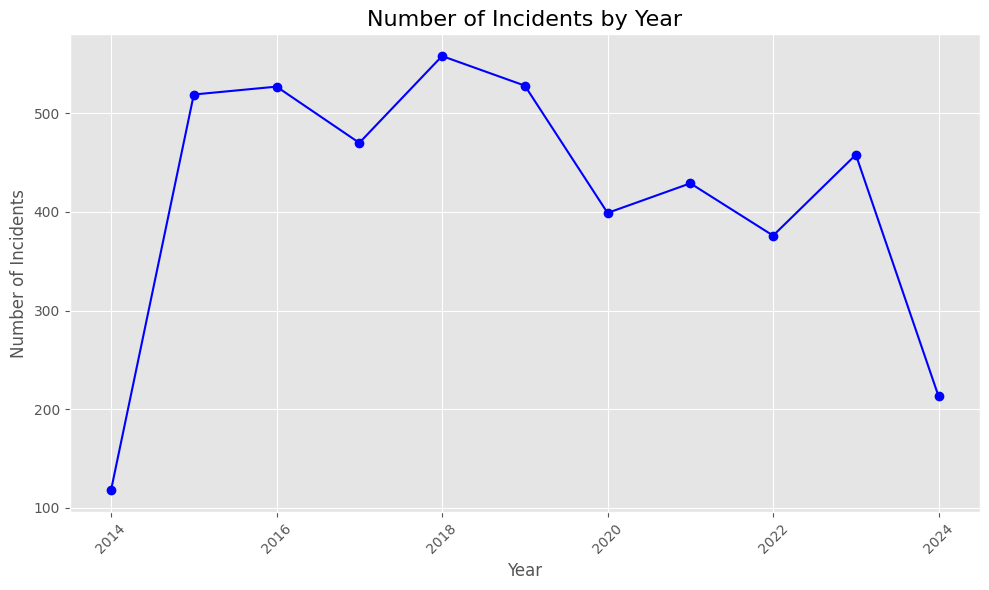

In [65]:
# Extract year from the 'date' column in df_copy
df_copy['year'] = df_copy['date'].dt.year

# Count incidents by year
incidents_by_year = df_copy['year'].value_counts().sort_index()

# Set ggplot style for consistency
plt.style.use('ggplot')

# Plot incidents by year as a line chart
plt.figure(figsize=(10, 6))
plt.plot(incidents_by_year.index, incidents_by_year.values, marker='o', linestyle='-', color='b')

# Customize the plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.title('Number of Incidents by Year', fontsize=16)
plt.xticks(rotation=45, fontsize=10)  # Rotate year labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



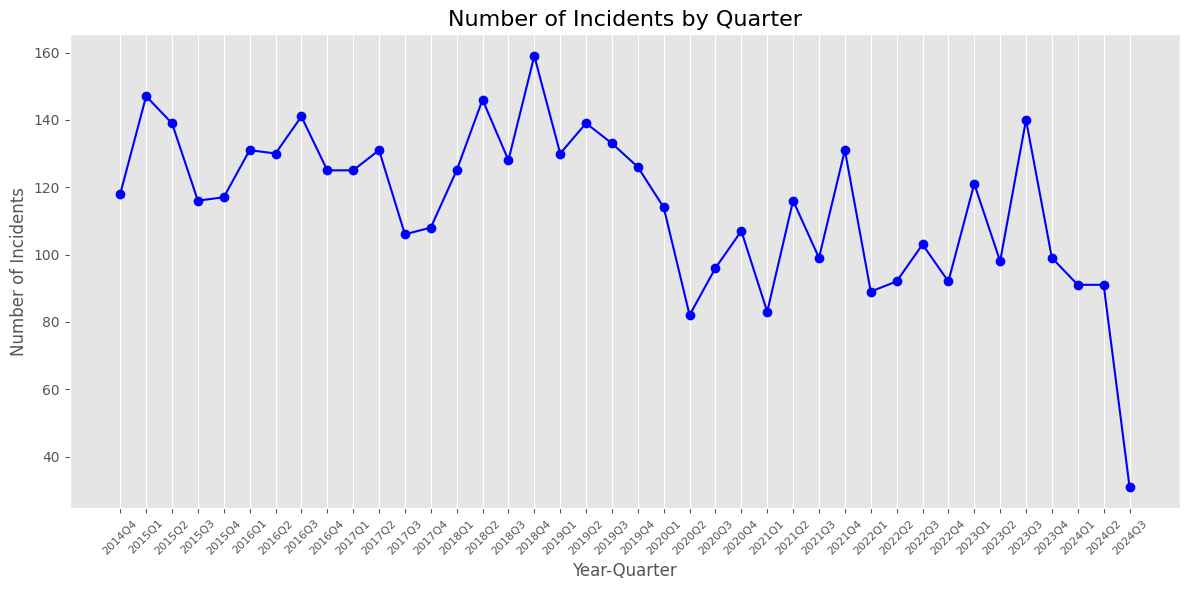

In [66]:
# Prepare data using df_copy
df_copy['quarter'] = df_copy['date'].dt.to_period('Q')
incidents_by_quarter = df_copy['quarter'].value_counts().sort_index()

# Extract year and quarter labels
quarters_with_years = [str(quarter) for quarter in incidents_by_quarter.index]  # E.g., '2014Q1'

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(quarters_with_years, incidents_by_quarter.values, marker='o', linestyle='-', color='b')

# Customize x-axis with year and quarter labels
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.title('Number of Incidents by Quarter', fontsize=16)
plt.xticks(ticks=range(len(quarters_with_years)), labels=quarters_with_years, rotation=45, fontsize=8)  # Add all labels

plt.grid(axis='y')
plt.tight_layout()
plt.show()




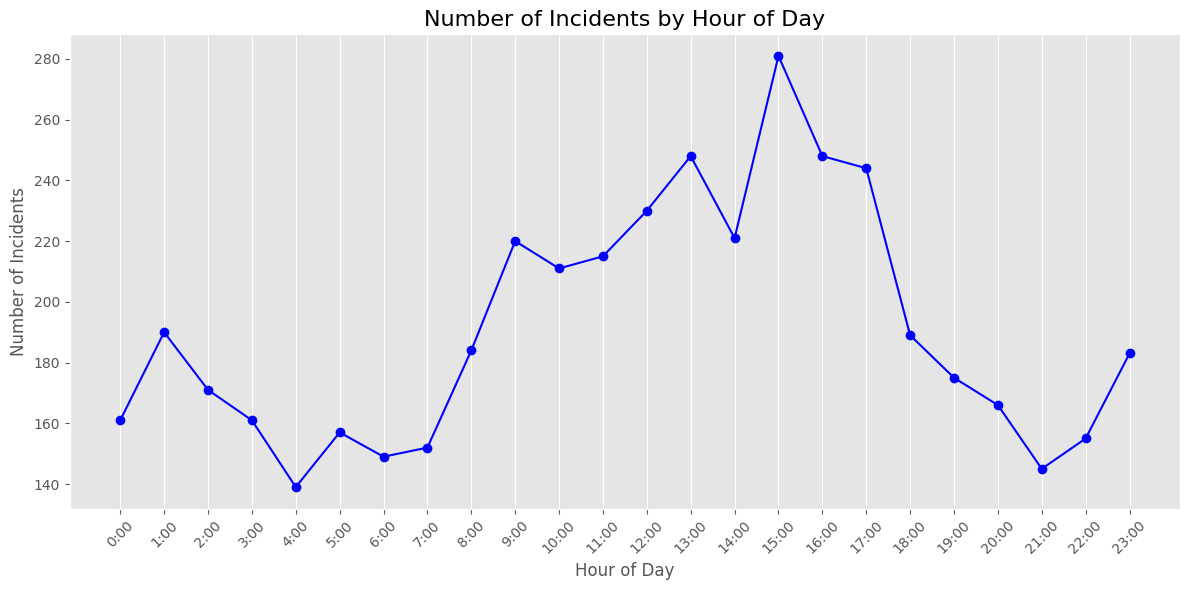

In [67]:
# Extract hour from the 'time' column in df_copy
df_copy['hour'] = pd.to_datetime(df_copy['time'], format='%I:%M %p', errors='coerce').dt.hour

# Count incidents by hour
incidents_by_hour = df_copy['hour'].value_counts().sort_index()

# Define formatted hour labels
hour_labels = [f"{h}:00" for h in range(24)]  # Creates labels like '0:00', '1:00', ..., '23:00'

# Plot incidents by hour with formatted labels
plt.figure(figsize=(12, 6))
plt.plot(incidents_by_hour.index, incidents_by_hour.values, marker='o', linestyle='-', color='b')
plt.xticks(range(24), hour_labels, rotation=45)  # Set x-ticks to formatted hour labels

# Add labels and title
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.title('Number of Incidents by Hour of Day', fontsize=16)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The peak around 9:00 am to 5:00 pm suggests that incidents are more common during regular work hours when rail traffic or activity might be higher.

<ipython-input-68-633825ca4e44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathercondition', y='totaldamagecost', data=df_copy, palette='Set3')


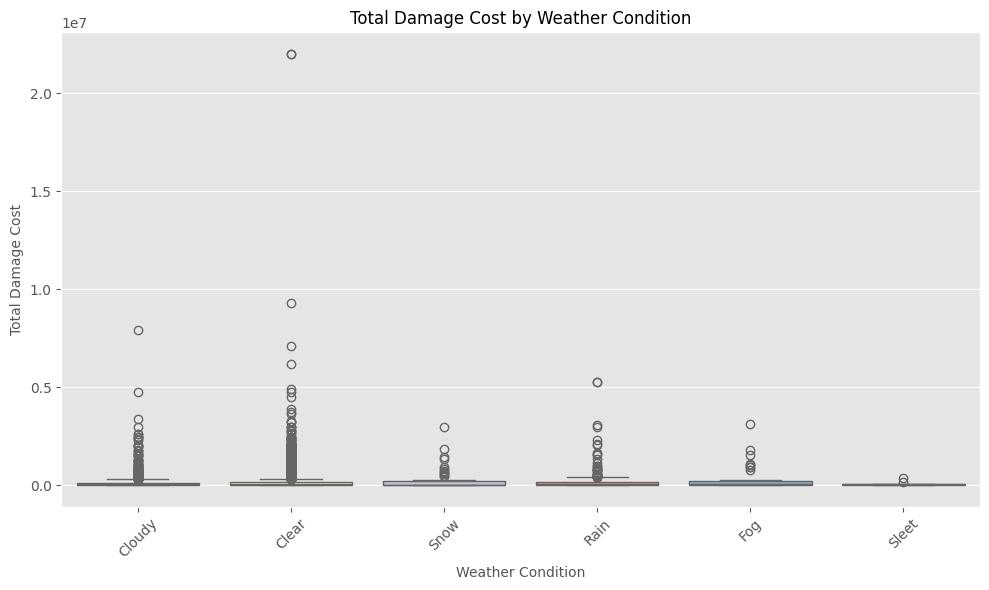

In [68]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathercondition', y='totaldamagecost', data=df_copy, palette='Set3')
plt.title("Total Damage Cost by Weather Condition", fontsize=12)
plt.xlabel("Weather Condition", fontsize=10)
plt.ylabel("Total Damage Cost", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



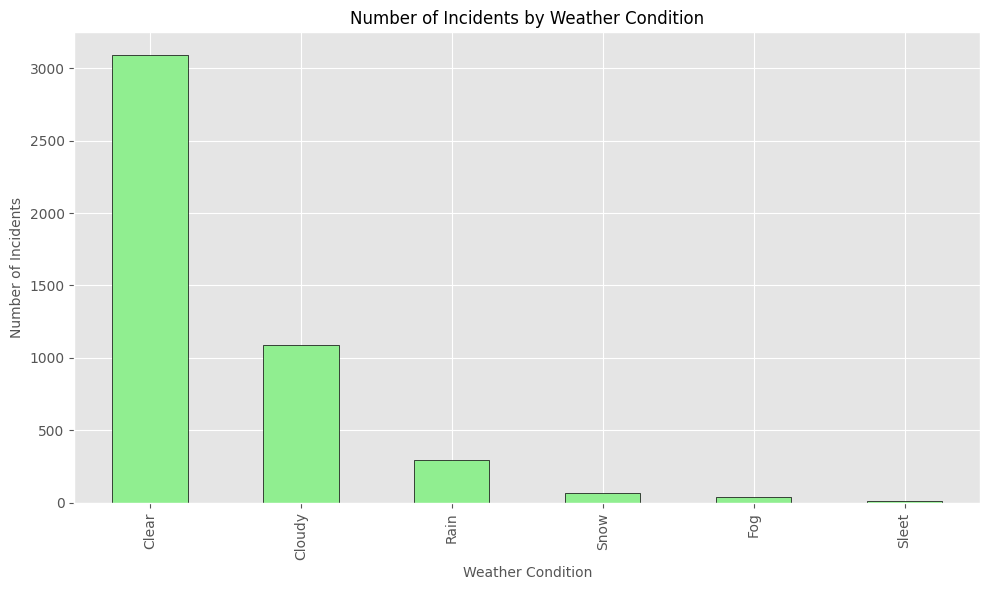

In [69]:
plt.figure(figsize=(10, 6))
df_copy['weathercondition'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Number of Incidents by Weather Condition", fontsize=12)
plt.xlabel("Weather Condition", fontsize=10)
plt.ylabel("Number of Incidents", fontsize=10)
plt.tight_layout()
plt.show()


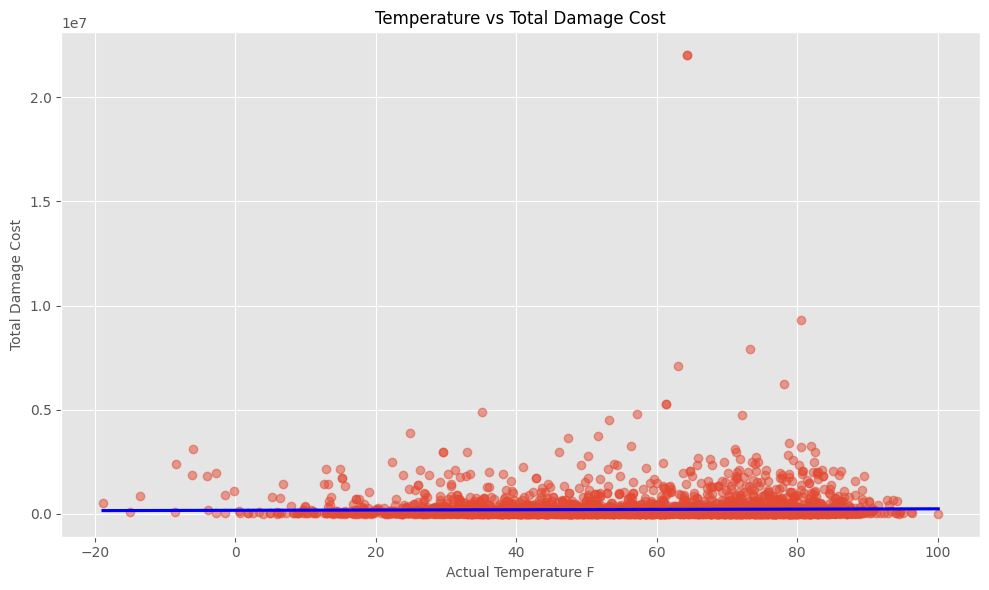

In [70]:
plt.figure(figsize=(10, 6))
sns.regplot(x='actual_temp', y='totaldamagecost', data=df_copy, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title("Temperature vs Total Damage Cost", fontsize=12)
plt.xlabel("Actual Temperature F", fontsize=10)
plt.ylabel("Total Damage Cost", fontsize=10)
plt.tight_layout()
plt.show()


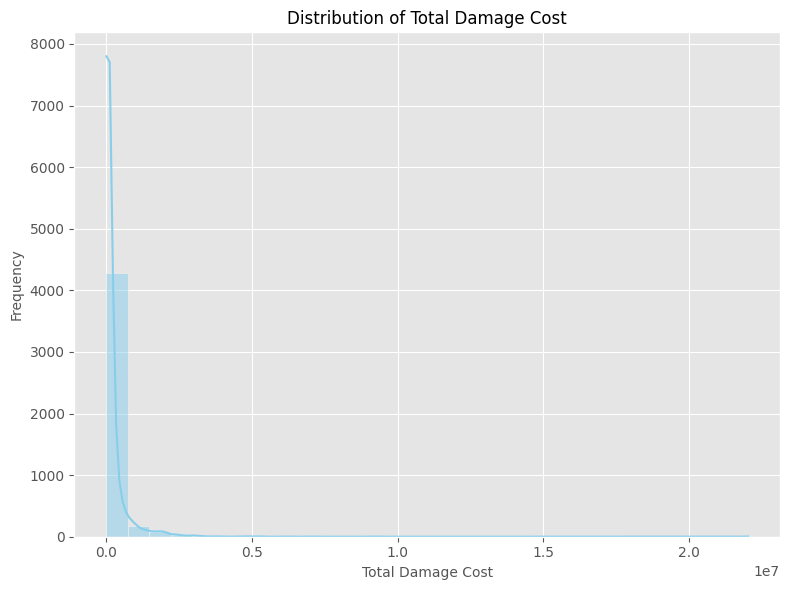

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(df_copy['totaldamagecost'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Total Damage Cost", fontsize=12)
plt.xlabel("Total Damage Cost", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.tight_layout()
plt.show()


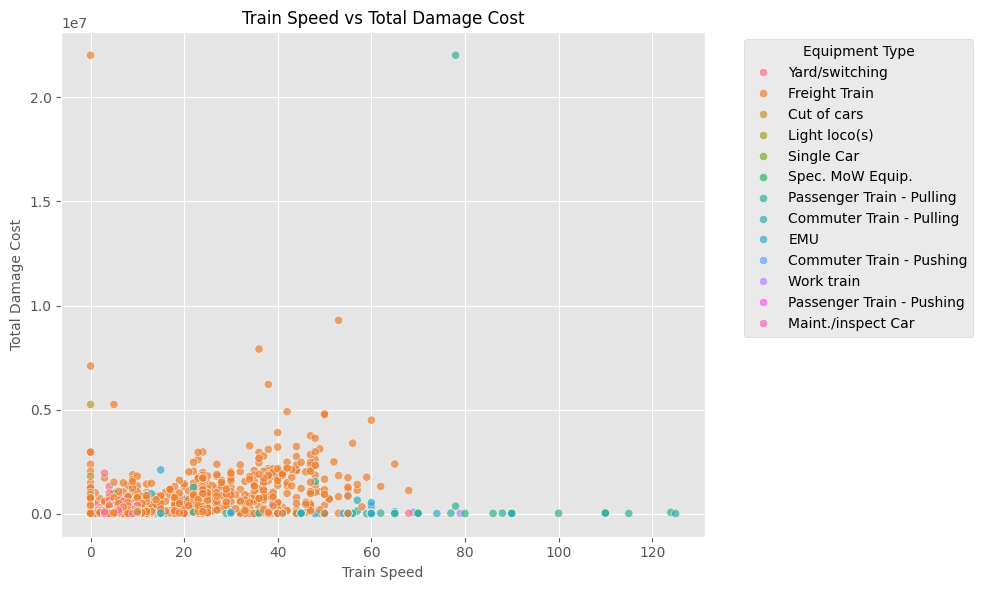

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trainspeed', y='totaldamagecost', data=df_copy, hue='equipmenttype', alpha=0.7)
plt.title("Train Speed vs Total Damage Cost", fontsize=12)
plt.xlabel("Train Speed", fontsize=10)
plt.ylabel("Total Damage Cost", fontsize=10)
plt.legend(title="Equipment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


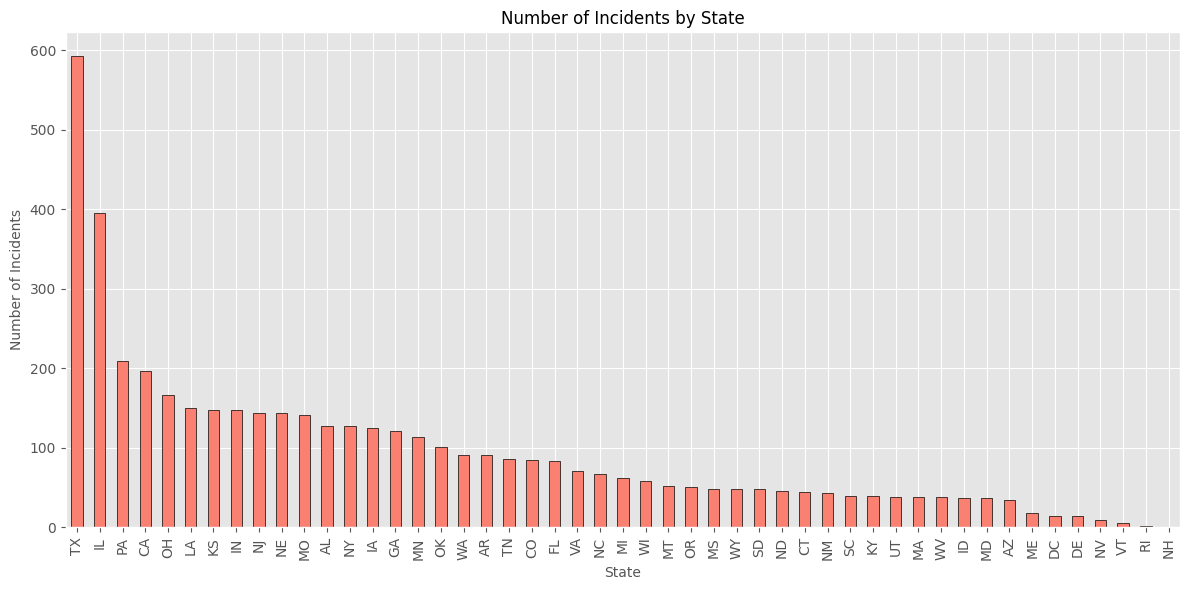

In [73]:
plt.figure(figsize=(12, 6))
df_copy['stateabbr'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Number of Incidents by State", fontsize=12)
plt.xlabel("State", fontsize=10)
plt.ylabel("Number of Incidents", fontsize=10)
plt.tight_layout()
plt.show()



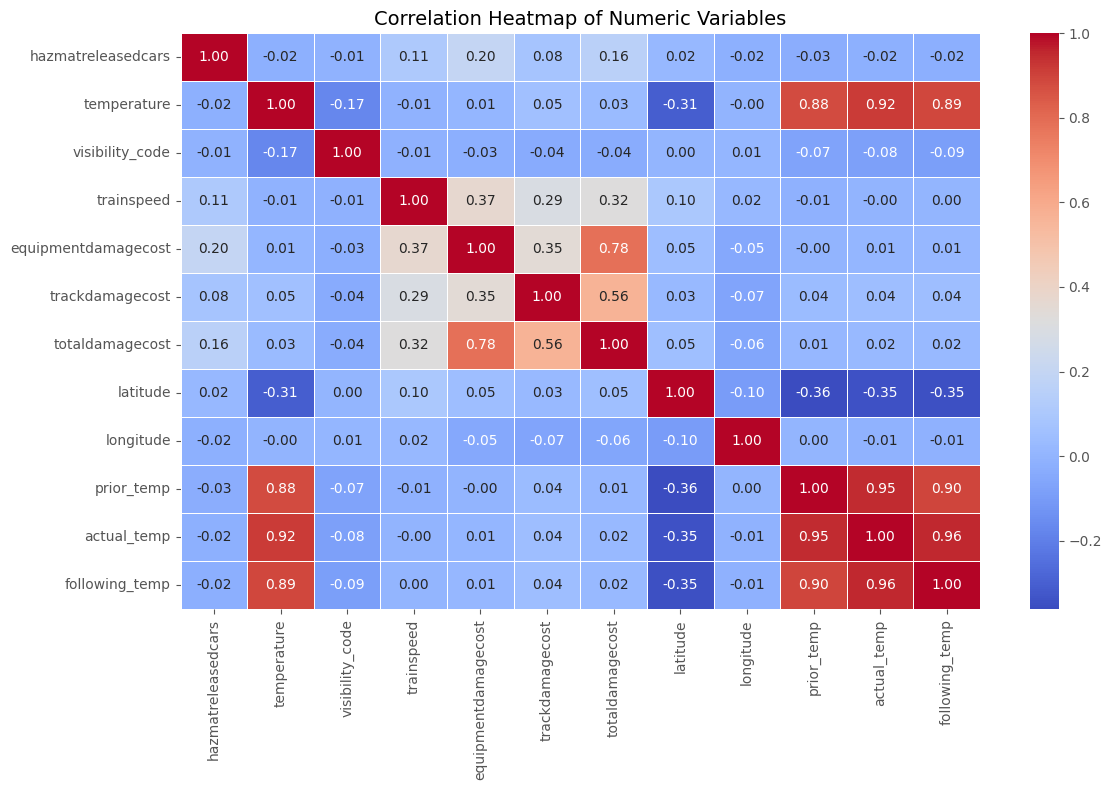

In [74]:
# Select only numeric columns from df_copy
numeric_df = df_copy.select_dtypes(include=['float64', 'int64'])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables", fontsize=14)
plt.tight_layout()
plt.show()


# Data Preprocessing

In [75]:
# Separate numerical and categorical column names (no .tolist())
num_col = df.select_dtypes(include=['float64', 'int64']).columns  # Numerical columns
cat_col = df.select_dtypes(include=['object']).columns           # Categorical columns

print("Numerical columns:")
print(num_col)
print('\nCategorical columns:')
print(cat_col)


Numerical columns:
Index(['hazmatreleasedcars', 'temperature', 'visibility_code', 'trainspeed',
       'equipmentdamagecost', 'trackdamagecost', 'totaldamagecost', 'latitude',
       'longitude', 'prior_temp', 'actual_temp', 'following_temp'],
      dtype='object')

Categorical columns:
Index(['reportingrailroadcode', 'accidentnumber', 'date', 'time',
       'accidenttype', 'station', 'stateabbr', 'visibility',
       'weathercondition', 'tracktype', 'equipmenttype',
       'primaryaccidentcausecode'],
      dtype='object')


In [76]:
# Perform one-hot encoding (dummy coding) for categorical variables
df_dummies = pd.get_dummies(df, columns=cat_col, drop_first=True)


In [77]:
df_dummies.columns



Index(['hazmatreleasedcars', 'temperature', 'visibility_code', 'trainspeed',
       'equipmentdamagecost', 'trackdamagecost', 'totaldamagecost', 'latitude',
       'longitude', 'prior_temp',
       ...
       'primaryaccidentcausecode_T316', 'primaryaccidentcausecode_T317',
       'primaryaccidentcausecode_T318', 'primaryaccidentcausecode_T319',
       'primaryaccidentcausecode_T399', 'primaryaccidentcausecode_T401',
       'primaryaccidentcausecode_T402', 'primaryaccidentcausecode_T403',
       'primaryaccidentcausecode_T404', 'primaryaccidentcausecode_T499'],
      dtype='object', length=9987)

In [78]:
# Identify high-cardinality categorical columns
high_cardinality_cols = [col for col in cat_col if df[col].nunique() > 20]
high_cardinality_cols

['reportingrailroadcode',
 'accidentnumber',
 'date',
 'time',
 'station',
 'stateabbr',
 'primaryaccidentcausecode']

In [79]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract useful components from 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Convert 'time' to datetime and extract hour
df['hour'] = pd.to_datetime(df['time'], format='%I:%M %p', errors='coerce').dt.hour

#Drop original high-cardinality and redundant columns
columns_to_drop = ['accidentnumber', 'date', 'time']  # Drop original columns
df_reduced = df.drop(columns=columns_to_drop, errors='ignore')

# Update categorical column list
cat_col = [col for col in cat_col if col not in columns_to_drop]


In [80]:
#Group rare categories in high-cardinality categorical columns
threshold = 10  # Categories with fewer than 10 occurrences will be grouped as 'Other'
for col in ['primaryaccidentcausecode', 'station', 'stateabbr']:
    value_counts = df_reduced[col].value_counts()  # Use reduced DataFrame
    rare_categories = value_counts[value_counts < threshold].index
    df_reduced[col] = df_reduced[col].replace(rare_categories, 'Other')


In [81]:
from sklearn.preprocessing import StandardScaler

# Convert num_col to a list if it is a Pandas Index
num_col = list(num_col)  # Convert to Python list

# Add the new numerical columns
num_col.extend(['year', 'month', 'day', 'hour'])

# Scale numerical variables
scaler = StandardScaler()
scaled_num_df = pd.DataFrame(
    scaler.fit_transform(df_reduced[num_col]),
    columns=num_col,
    index=df_reduced.index
)


In [82]:
# Apply one-hot encoding to categorical variables
encoded_cat_df = pd.get_dummies(df_reduced[cat_col], drop_first=True)

# Combine scaled numerical variables and encoded categorical variables
df_preprocessed = pd.concat([scaled_num_df, encoded_cat_df], axis=1)

# Verify the resulting DataFrame
print(f"Shape of preprocessed DataFrame: {df_preprocessed.shape}")
print("Columns in preprocessed DataFrame:")
print(df_preprocessed.columns)

Shape of preprocessed DataFrame: (4595, 530)
Columns in preprocessed DataFrame:
Index(['hazmatreleasedcars', 'temperature', 'visibility_code', 'trainspeed',
       'equipmentdamagecost', 'trackdamagecost', 'totaldamagecost', 'latitude',
       'longitude', 'prior_temp',
       ...
       'primaryaccidentcausecode_T315', 'primaryaccidentcausecode_T316',
       'primaryaccidentcausecode_T317', 'primaryaccidentcausecode_T319',
       'primaryaccidentcausecode_T399', 'primaryaccidentcausecode_T401',
       'primaryaccidentcausecode_T402', 'primaryaccidentcausecode_T403',
       'primaryaccidentcausecode_T404', 'primaryaccidentcausecode_T499'],
      dtype='object', length=530)


In [83]:
# Combine Scaled Numerical Variables and Encoded Categorical Variables
df_preprocessed = pd.concat([scaled_num_df, encoded_cat_df], axis=1)

# Check the final shape of the preprocessed DataFrame
print(f"Shape of preprocessed DataFrame: {df_preprocessed.shape}")

Shape of preprocessed DataFrame: (4595, 530)


Splitting the data

In [84]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_preprocessed.drop(columns=['totaldamagecost'])  # Exclude the target variable
y = df['totaldamagecost']  # Use the original target variable

# Split into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (3216, 529)
Test set shape: (1379, 529)


In [85]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model with an RBF kernel
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_model.predict(X_test)

In [86]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"SVR - Mean Squared Error (MSE): {mse}")
print(f"SVR - R² Score: {r2}")

SVR - Mean Squared Error (MSE): 582039053376.3671
SVR - R² Score: -0.047747787489970106


In [87]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'C': [0.1, 1, 10],
#     'epsilon': [0.01, 0.1, 1],
#     'gamma': ['scale', 'auto']
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Best parameters and performance
# print("Best Parameters:", grid_search.best_params_)
# best_svr = grid_search.best_estimator_


Best Parameters: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale'}

In [88]:
# Train the SVR model with optimized parameters
optimized_svr = SVR(kernel='rbf', C=10, epsilon=0.01, gamma='scale')

# Fit the model on the training data
optimized_svr.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized = optimized_svr.predict(X_test)

# Evaluate the optimized model
from sklearn.metrics import mean_squared_error, r2_score
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized SVR - Mean Squared Error (MSE): {mse_optimized}")
print(f"Optimized SVR - R² Score: {r2_optimized}")


Optimized SVR - Mean Squared Error (MSE): 581908158867.3999
Optimized SVR - R² Score: -0.04751215994681912


In [89]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R² Score: {r2_rf}")


Random Forest - Mean Squared Error (MSE): 231612282035.0642
Random Forest - R² Score: 0.5830670559818576


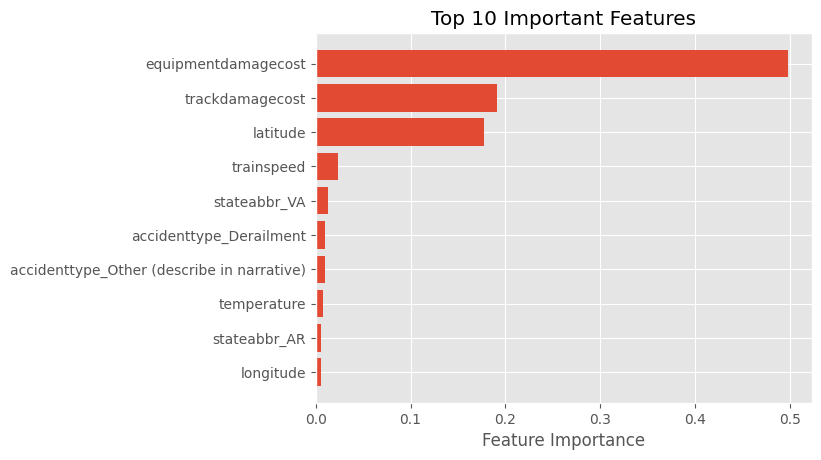

In [90]:
# Plot feature importance
importance = rf_model.feature_importances_
feature_names = X_train.columns

# Sort and plot top 10 features
sorted_idx = importance.argsort()[-10:]
plt.barh(range(10), importance[sorted_idx])
plt.yticks(range(10), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.show()


In [91]:
# Select top N important features
top_features = importance.argsort()[-20:]  # Adjust the number of features as needed
X_train_top = X_train.iloc[:, top_features]
X_test_top = X_test.iloc[:, top_features]



In [92]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(
#     estimator=RandomForestRegressor(random_state=42),
#     param_grid=param_grid,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1
# )

# grid_search.fit(X_train_top, y_train)
# print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor with optimized parameters
optimized_rf_model = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the model
optimized_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_optimized_rf = optimized_rf_model.predict(X_test)

# Evaluate the model
mse_optimized_rf = mean_squared_error(y_test, y_pred_optimized_rf)
r2_optimized_rf = r2_score(y_test, y_pred_optimized_rf)

print(f"Optimized Random Forest - Mean Squared Error (MSE): {mse_optimized_rf}")
print(f"Optimized Random Forest - R² Score: {r2_optimized_rf}")


Optimized Random Forest - Mean Squared Error (MSE): 216380450851.7496
Optimized Random Forest - R² Score: 0.610486380044669


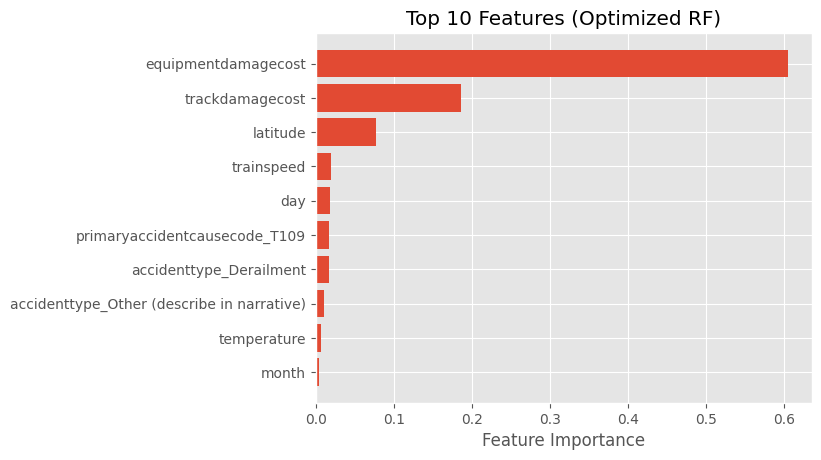

In [94]:
importance = optimized_rf_model.feature_importances_
sorted_idx = importance.argsort()[-10:]
plt.barh(range(10), importance[sorted_idx])
plt.yticks(range(10), X_train.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Features (Optimized RF)")
plt.show()


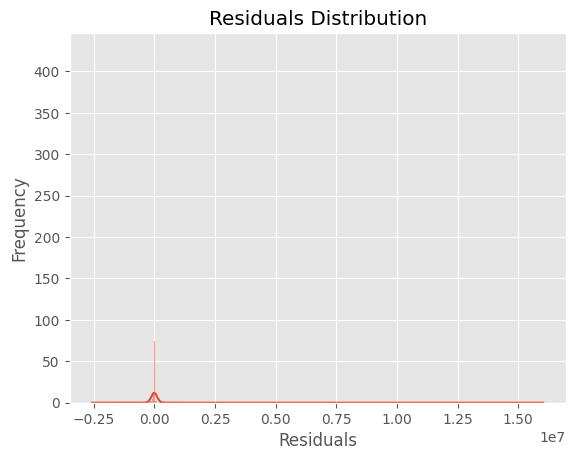

In [95]:
import seaborn as sns

residuals = y_test - y_pred_optimized_rf
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [107]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=200,  # Number of boosting rounds
    learning_rate=0.01,  # Step size shrinkage
    max_depth=6,  # Maximum tree depth
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost - R² Score: {r2_xgb}")


XGBoost - Mean Squared Error (MSE): 296952518192.2886
XGBoost - R² Score: 0.465445876121521
